In [21]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


In [13]:
# !pip install --upgrade scikit-learn mlxtend

  Using cached mlxtend-0.24.0-py3-none-any.whl.metadata (7.3 kB)
INFO: pip is looking at multiple versions of mlxtend to determine which version is compatible with other requirements. This could take a while.


In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
x_train, x_test , y_train , y_test = train_test_split(df.iloc[:,:-1],df['medv'],test_size=0.2,random_state=1)

In [8]:
print(x_train.shape)

print(x_test.shape)

print(y_train.shape)

print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [9]:
x_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81
58,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,8,284,19.7,390.68,6.86
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34
424,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666,20.2,396.90,19.37
235,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307,17.4,376.75,10.88


In [10]:
ss = StandardScaler()

In [11]:
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.fit_transform(x_test)

## Base Model 

In [12]:
model = LinearRegression()

In [13]:
print("training",np.mean(cross_val_score(model, x_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, x_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096217
testing 0.6514899901155449


## Now using Sequential Backward Elimination

In [15]:
lr = LinearRegression()

# perform backward elimination
sfs = SFS(lr, k_features='best', forward=True, floating=False, scoring='r2',cv=5)

sfs.fit(x_train_scaled, y_train)

,estimator,LinearRegression()
,k_features,"(1, ...)"
,forward,True
,floating,False
,verbose,0
,scoring,'r2'
,cv,5
,n_jobs,1
,pre_dispatch,'2*n_jobs'
,clone_estimator,True
,fixed_features,None


In [17]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [19]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1)
    return 1 - (1 - r2) * coef

In [20]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
1,"(12,)","[0.5472998394577442, 0.49002001493399727, 0.53...",0.538451,"(12,)",0.032755,0.025485,0.012742,404,1,0.537303
2,"(5, 12)","[0.6330856272904802, 0.5779812120755249, 0.586...",0.613259,"(5, 12)",0.034066,0.026505,0.013252,404,2,0.61133
3,"(5, 10, 12)","[0.7215896884753017, 0.6288372046797153, 0.633...",0.661012,"(5, 10, 12)",0.04259,0.033136,0.016568,404,3,0.65847
4,"(5, 10, 11, 12)","[0.725877216548624, 0.6342604286872173, 0.6558...",0.667383,"(5, 10, 11, 12)",0.039611,0.030819,0.01541,404,4,0.664048
5,"(5, 7, 10, 11, 12)","[0.7440756174774326, 0.6473449858158777, 0.614...",0.671496,"(5, 7, 10, 11, 12)",0.055057,0.042836,0.021418,404,5,0.667369
6,"(4, 5, 7, 10, 11, 12)","[0.7554472741494642, 0.6695521143038103, 0.653...",0.68562,"(4, 5, 7, 10, 11, 12)",0.047626,0.037054,0.018527,404,6,0.680869
7,"(1, 4, 5, 7, 10, 11, 12)","[0.7548843433907461, 0.6798073590310516, 0.662...",0.6913,"(1, 4, 5, 7, 10, 11, 12)",0.042762,0.03327,0.016635,404,7,0.685844
8,"(0, 1, 4, 5, 7, 10, 11, 12)","[0.7678201537729974, 0.6827004362205138, 0.671...",0.695442,"(0, 1, 4, 5, 7, 10, 11, 12)",0.048774,0.037948,0.018974,404,8,0.689274
9,"(0, 1, 4, 5, 7, 8, 10, 11, 12)","[0.7746648196407366, 0.6850585456872307, 0.683...",0.703763,"(0, 1, 4, 5, 7, 8, 10, 11, 12)",0.04762,0.03705,0.018525,404,9,0.696996
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905563, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,404,10,0.702654


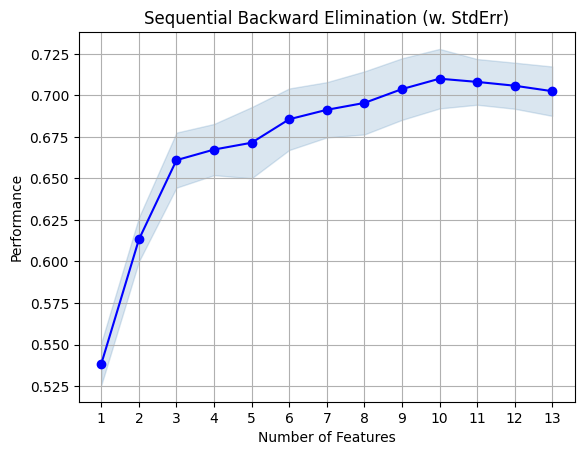

In [22]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [24]:
X_train_sel = sfs.transform(x_train_scaled)
X_test_sel = sfs.transform(x_test_scaled)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218562
testing 0.720581929612448


In [25]:
X_train_sel.shape

(404, 10)

## Using Sk-Learn

In [28]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS


sfs2 = SFS(model,
           n_features_to_select=5,
           direction='forward',
           scoring='r2',
           n_jobs=-1,
           cv=5)

sfs2 = sfs2.fit(x_train_scaled, y_train)

In [29]:
sfs2.support_

array([False, False, False, False, False,  True, False,  True, False,
       False,  True,  True,  True])

In [31]:
np.arange(x_train_scaled.shape[1])[sfs2.support_]

array([ 5,  7, 10, 11, 12])